# Rendu TSA 

Mathieu Laversin 
Alexandra Mille egea
Ryan Pegoud

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('fr.csv')
df.head()

,start,end,load
0,2015-01-01 00:00:00+00:00,2015-01-01 01:00:00+00:00,70929.0
1,2015-01-01 01:00:00+00:00,2015-01-01 02:00:00+00:00,69773.0
2,2015-01-01 02:00:00+00:00,2015-01-01 03:00:00+00:00,66417.0
3,2015-01-01 03:00:00+00:00,2015-01-01 04:00:00+00:00,64182.0
4,2015-01-01 04:00:00+00:00,2015-01-01 05:00:00+00:00,63859.0


# **Descriptive analysis**

In [30]:
df.describe()

,load
count,48870.000000
mean,53556.308267
std,11682.584881
min,29398.000000
25%,44616.000000
50%,51932.000000
75%,61629.750000
max,158000.000000


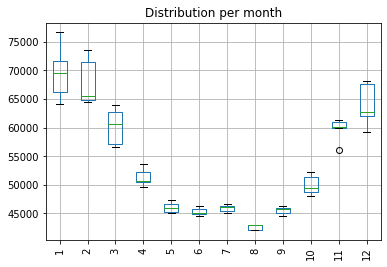

In [61]:
df.boxplot(rot=90)
plt.title("Distribution per month")
plt.show()

We actually see that there is a correct distribution, the data is quite clean. There is one outlier in november but actually could be a day with a huge load nothing else. 

# **Down sampling**

In [31]:
df['start'] = pd.to_datetime(df['start'], format='%Y/%m/%d %H:%M:%S')
df['end'] = pd.to_datetime(df['end'], format='%Y/%m/%d %H:%M:%S')

df.set_index('start', inplace=True)

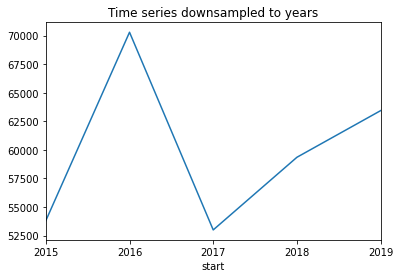

In [32]:
df["load"].asfreq('Y').plot()
plt.title('Time series downsampled to years')
plt.show()

In [33]:
df['year'] = pd.DatetimeIndex(df.index).year
yearly = df.groupby('year').agg('sum')
yearly

,load
year,
2015,470012917.0
2016,477474024.0
2017,475934939.0
2018,470394794.0
2019,467000414.0
2020,256479697.0


# **Monthly Moving Averages**

In [34]:
df['month'] = pd.DatetimeIndex(df.index).month
df_month_year= df.groupby(['year','month']).agg('mean')
df_month_year

load
year month              
2015 1      69523.116935
     2      71374.474702
     3      60624.438172
     4      50608.841667
     5      45209.040377
...                  ...
2020 3      55252.318489
     4      42409.579167
     5      40946.911290
     6      42225.624478
     7      44123.798387

[67 rows x 1 columns]

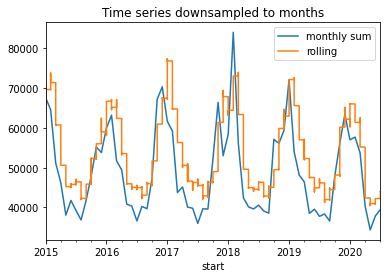

In [35]:
df["load"].asfreq('M').plot(label='monthly sum')

rolling_load = df.load.rolling('30D').mean()
rolling_load.plot(label='rolling')
plt.legend()
plt.title('Time series downsampled to months')
plt.show()

# **Seasonality**

In [49]:
#melted_y_m = df.melt(id_vars=['year','month'], value_vars='load').drop('variable',axis=1)
melted_means = melted_y_m.groupby(['year','month']).agg('mean')
melted_means.value

year  month
2015  1        69523.116935
      2        71374.474702
      3        60624.438172
      4        50608.841667
      5        45209.040377
                   ...     
2020  3        55252.318489
      4        42409.579167
      5        40946.911290
      6        42225.624478
      7        44123.798387
Name: value, Length: 67, dtype: float64

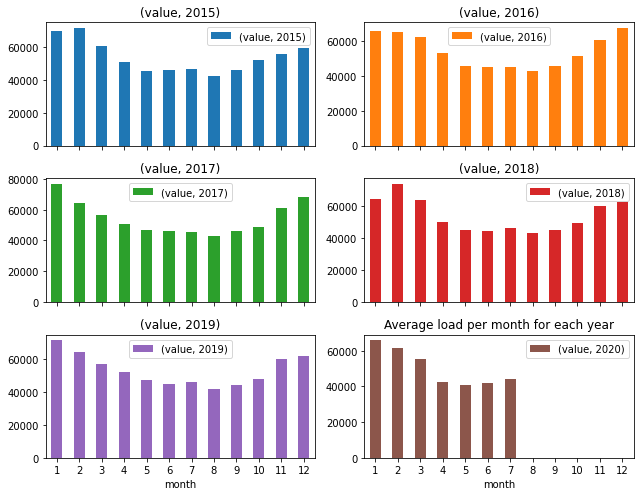

In [37]:
melted_means.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(9, 7), layout=(3,2))
plt.title('Average load per month for each year')
plt.tight_layout()

In [38]:
melted_means['year'] = [melted_means.index[i][0] for i in range(melted_means.shape[0])]

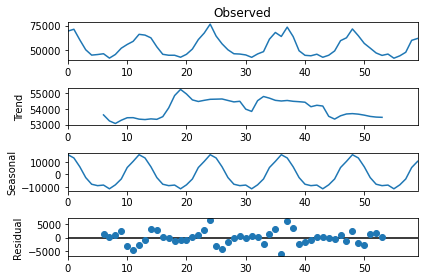

In [39]:
import statsmodels.api as sm

values = melted_means[melted_means['year']<2020]['value'] # monthly means between 2015 and 2019 (2020 is incomplete)
values = np.array(values, dtype=object)
decomposed = sm.tsa.seasonal_decompose(values, period=12) # yearly seasonality
decomposed.plot()
plt.show()

We actually see the additivity of our data with the trend.

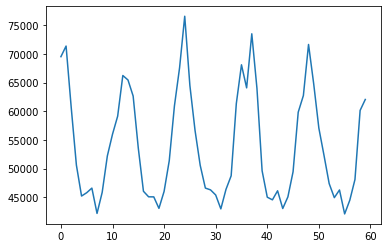

In [40]:
plt.plot(values)

In [41]:
train = melted_means[melted_means['year']<2018]
test = melted_means[melted_means['year'].between(2018,2020)]

In [42]:
# from statsmodels.tsa.holtwinters import ExponentialSmoothing
# model = ExponentialSmoothing(values, trend='add')
# model_fit = model.fit()
# yhat = model_fit.predict(...)



Forecast with 2 methods

Explain our data, interpret result

Add / Mult

Expliquer 


Seasonality ok ! 

In [43]:
list_2015  = np.array(melted_means[melted_means['year'] == 2015].value)

list_2015_BBT = list_2015.argsort()[::-1]

In [44]:
list_2015  = np.array(melted_means[melted_means['year'] == 2015].value)
list_2016  = np.array(melted_means[melted_means['year'] == 2016].value)
list_2017  = np.array(melted_means[melted_means['year'] == 2017].value)
list_2018  = np.array(melted_means[melted_means['year'] == 2018].value)
list_2019  = np.array(melted_means[melted_means['year'] == 2019].value)

list_tot = zip(list_2015,list_2016, list_2017, list_2018,list_2019)
list_tot

df = pd.DataFrame(list_tot, columns= ['2015', '2016', '2017', '2018','2019'],index=  ['1', '2', '3', '4', '5', '6','7','8', '9', '10', '11', '12'])
df = df.T

#find the index sorted
df_BBT = df.apply(lambda x : np.argsort(x)[::-1], axis = 1)



df_BBT = pd.DataFrame(df_BBT,columns=  ['1', '2', '3', '4', '5', '6','7','8', '9', '10', '11', '12'] )
        
df_BBT




,1,2,3,4,5,6,7,8,9,10,11,12
2015,7,4,5,8,6,3,9,10,11,2,0,1
2016,7,6,5,8,4,9,3,10,2,1,0,11
2017,7,6,5,8,4,9,3,2,10,1,11,0
2018,7,5,4,8,6,9,3,10,11,2,0,1
2019,7,8,5,6,4,9,3,2,10,11,1,0


In [53]:
df

,1,2,3,4,5,6,7,8,9,10,11,12
2015,69523.116935,71374.474702,60624.438172,50608.841667,45209.040377,45791.429167,46594.583333,42179.075269,45854.165278,52204.977151,55992.606944,59144.080645
2016,66238.393001,65456.584770,62657.708333,53561.547222,46039.493280,45074.777778,45063.494624,43061.591644,46014.625869,51370.367925,60905.600000,67580.565860
2017,76576.409946,64492.857360,56649.130728,50570.852778,46599.579301,46285.769444,45394.674731,42969.552419,46379.306944,48739.939271,61332.721836,68105.079301
2018,64082.051075,73514.922619,63991.896366,49617.140473,45009.065860,44546.628651,46125.818548,43033.874154,45067.147222,49439.654003,59837.315278,62741.384615
2019,71653.067204,64792.186012,57063.743280,52297.087866,47382.020161,44931.127778,46268.998645,42090.655914,44486.911111,48095.805930,60150.695833,62055.150740


As the dataframe is quite simple we can see that the seasonality is rigid cause we can see a patern of month. 

Find the most frequent in the list and make a dataframe of the most frequent to see if the data is seasonal 

In [52]:
from statsmodels.tsa.seasonal import STL

# Set robust to True to handle outliers
res = STL(np.array(melted_means.value), robust = True).fit() 
res.plot()
plt.show()

ValueError: Unable to determine period from endog

Phophet 